Loading

In [1]:
import pandas as pd
df = pd.read_csv('AB_NYC_2019.csv')
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
print(df.describe(include='all'))

(48895, 16)
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude             

Missing Values & Date Parsing

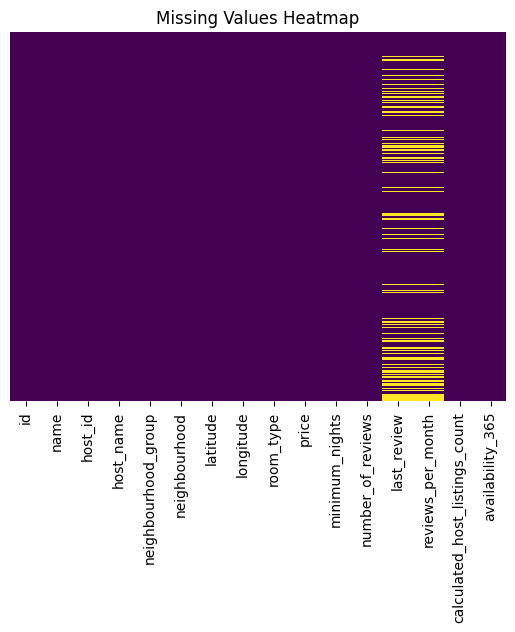

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
df['last_review'] = pd.to_datetime(df['last_review'])

Univariate Analysis

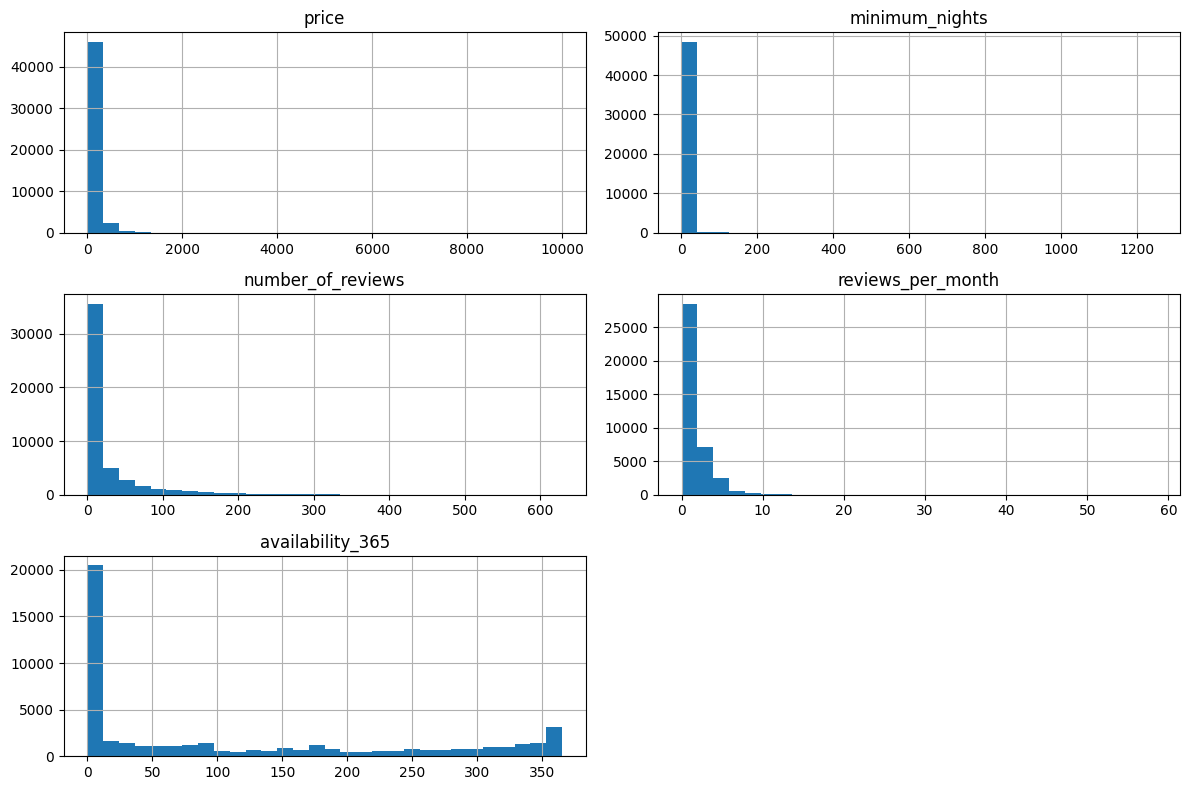

In [6]:
numerical = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
df[numerical].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

Outlier Detection

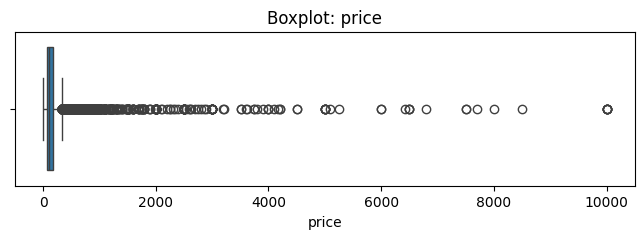

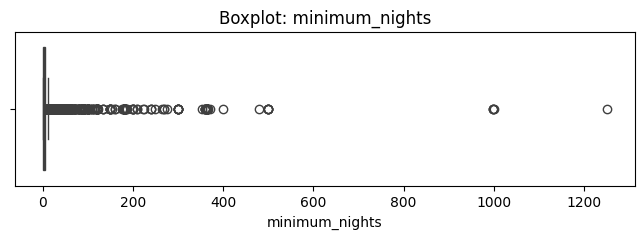

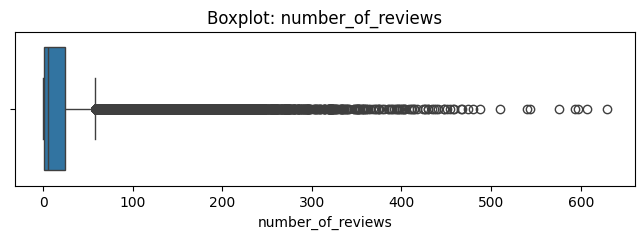

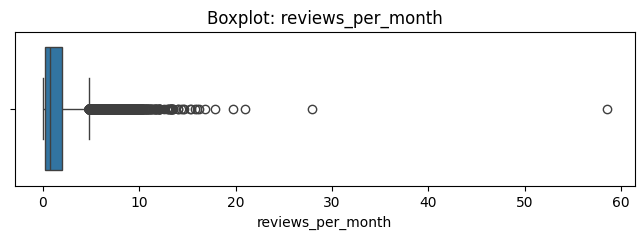

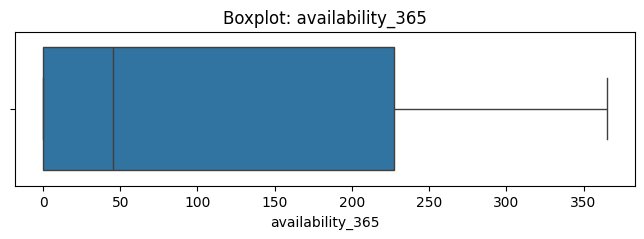

In [7]:
for col in numerical:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


Geospatial Insight

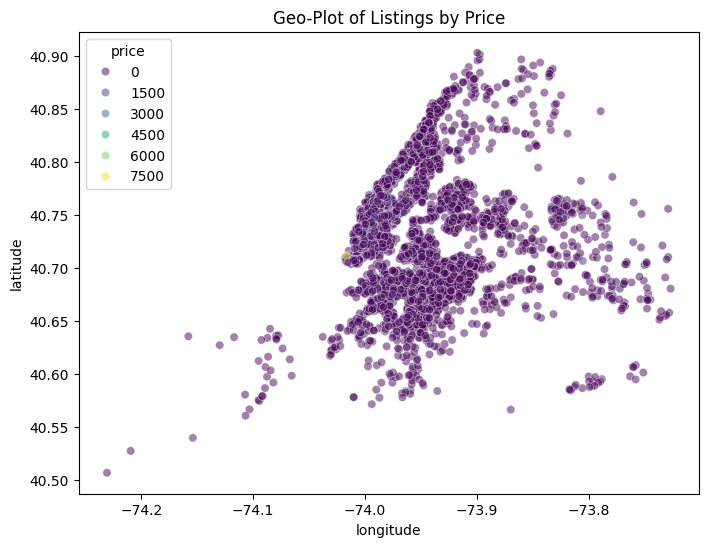

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='longitude', y='latitude',
    hue='price', data=df.sample(5000),
    palette='viridis', alpha=0.5
)
plt.title('Geo-Plot of Listings by Price')
plt.show()


Categorical Distributions

Text(0.5, 1.0, 'Price by Room Type')

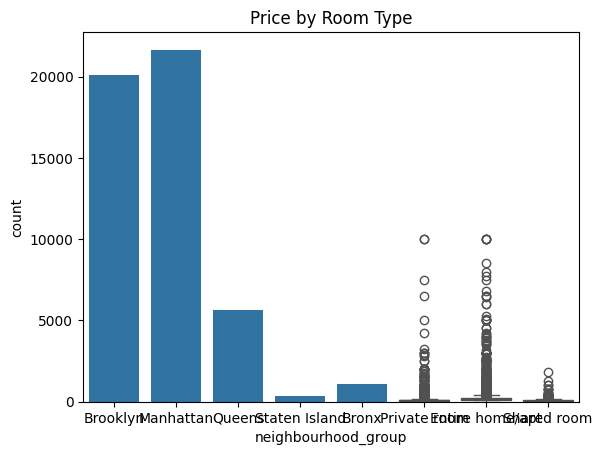

In [9]:
sns.countplot(x='neighbourhood_group', data=df)
plt.title("Listings per Borough")
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price by Room Type")

Correlations & Relationships

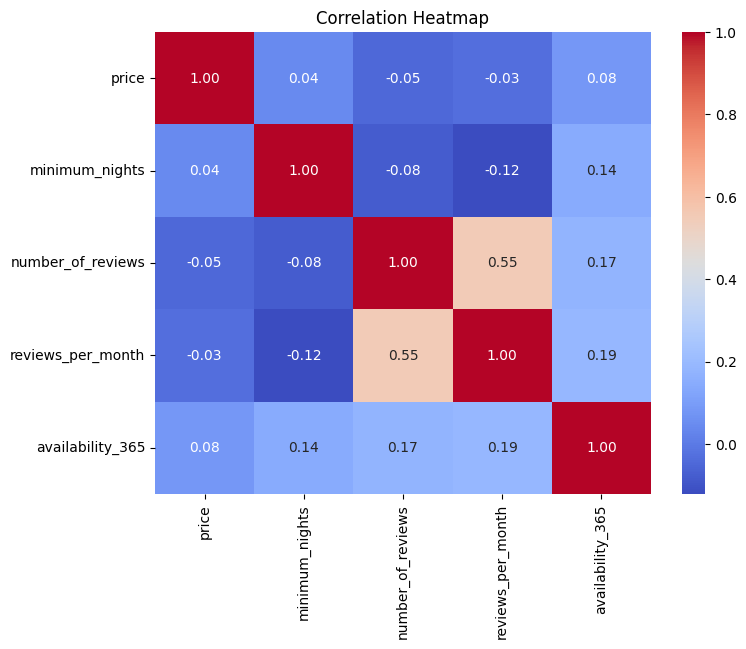

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Trend Over Time

/tmp/ipython-input-11-651585215.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='last_review')['number_of_reviews'].sum().plot()


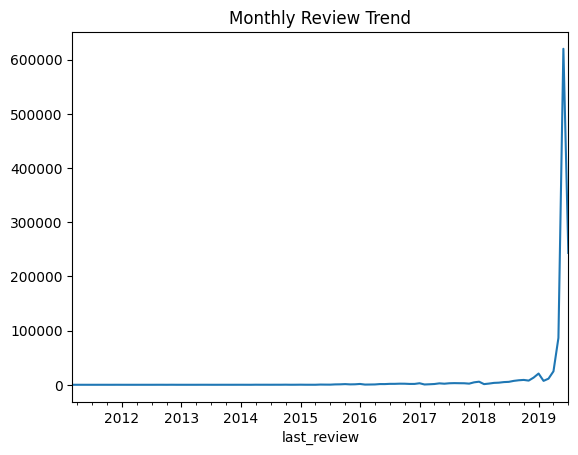

In [11]:
df.resample('M', on='last_review')['number_of_reviews'].sum().plot()
plt.title("Monthly Review Trend")
plt.show()